In [1]:
pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/berkayalan/ecommerce-sales-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rshailaj
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/berkayalan/ecommerce-sales-dataset


In [4]:
import pandas as pd
data=pd.read_csv("/content/ecommerce-sales-dataset/basket_details.csv")

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
customers = pd.read_csv('/content/cleaned_data.csv')
baskets = pd.read_csv('/content/cleaned_basket_data.csv')

In [8]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13293 entries, 0 to 13292
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   13293 non-null  int64  
 1   sex           13293 non-null  object 
 2   customer_age  13293 non-null  float64
 3   tenure        13293 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 415.5+ KB
None


In [20]:
print(customers.head())
print(customers.info())
print(customers.describe())

   customer_id   sex  customer_age  tenure
0      9798859  Male          44.0      93
1     11413563  Male          36.0      65
2       818195  Male          35.0     129
3     12049009  Male          33.0      58
4     10083045  Male          42.0      88
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13293 entries, 0 to 13292
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   13293 non-null  int64  
 1   sex           13293 non-null  object 
 2   customer_age  13293 non-null  float64
 3   tenure        13293 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 415.5+ KB
None
        customer_id  customer_age        tenure
count  1.329300e+04  13293.000000  13293.000000
mean   1.614164e+07     32.209133     51.479500
std    8.470525e+06     10.791678     34.896929
min    2.093000e+03      3.000000      4.000000
25%    1.067375e+07     27.000000     23.000000
50%    1.416539e+07

In [21]:
print(baskets.head())
print(baskets.info())
print(baskets.describe())

   customer_id  product_id basket_date  basket_count
0     42366585    41475073  2019-06-19             2
1     35956841    43279538  2019-06-19             2
2     26139578    31715598  2019-06-19             3
3      3262253    47880260  2019-06-19             2
4     20056678    44747002  2019-06-19             2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   15000 non-null  int64 
 1   product_id    15000 non-null  int64 
 2   basket_date   15000 non-null  object
 3   basket_count  15000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 468.9+ KB
None
        customer_id    product_id  basket_count
count  1.500000e+04  1.500000e+04  15000.000000
mean   1.808567e+07  3.269771e+07      2.153733
std    1.233000e+07  1.629455e+07      0.517929
min    4.784000e+03  4.939000e+04      2.000000
25%    8.659327e+06  3.13

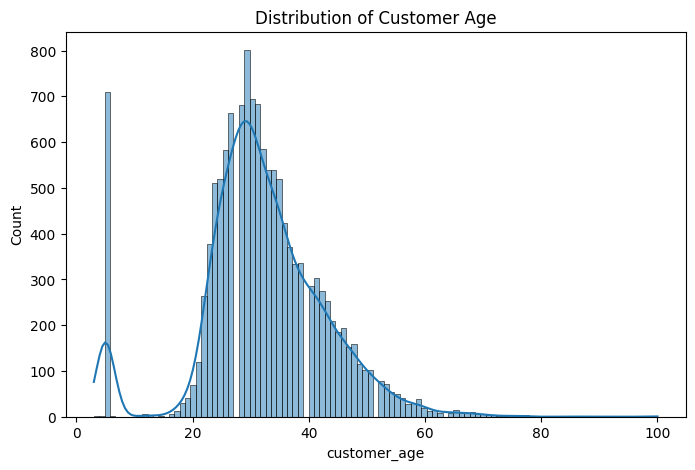

In [24]:
#Customer Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(customers['customer_age'], kde=True)
plt.title("Distribution of Customer Age")
plt.show()

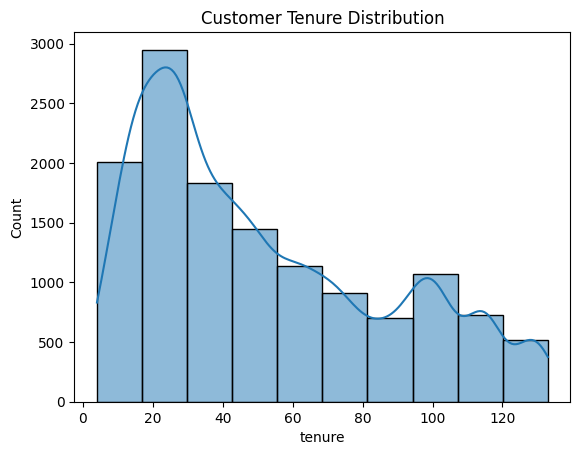

In [25]:
#Customer Tenure Distribution
sns.histplot(customers['tenure'], bins=10, kde=True)
plt.title("Customer Tenure Distribution")
plt.show()

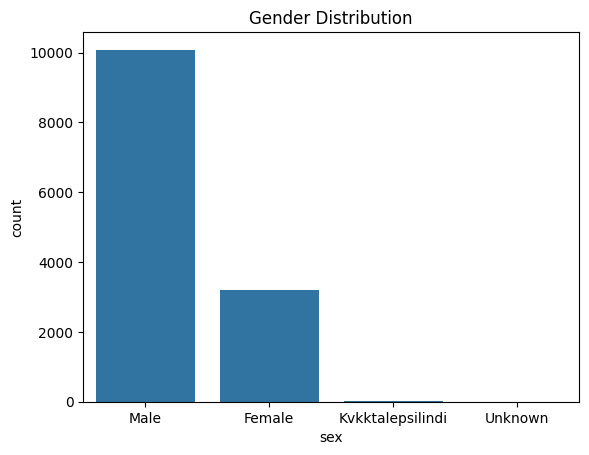

In [26]:
#Gender Count
sns.countplot(x='sex', data=customers)
plt.title("Gender Distribution")
plt.show()

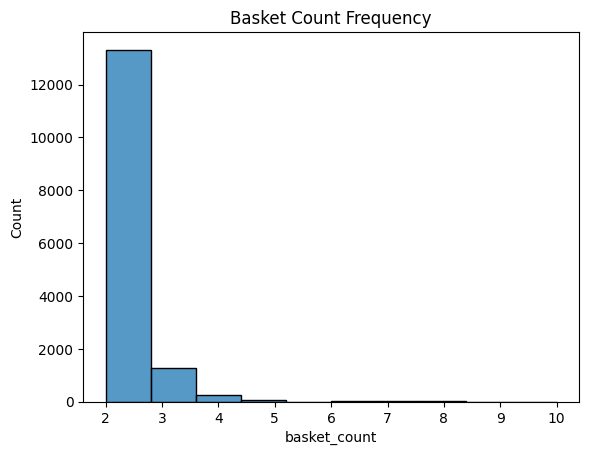

In [27]:
#Basket Count Frequency
sns.histplot(baskets['basket_count'], bins=10)
plt.title("Basket Count Frequency")
plt.show()

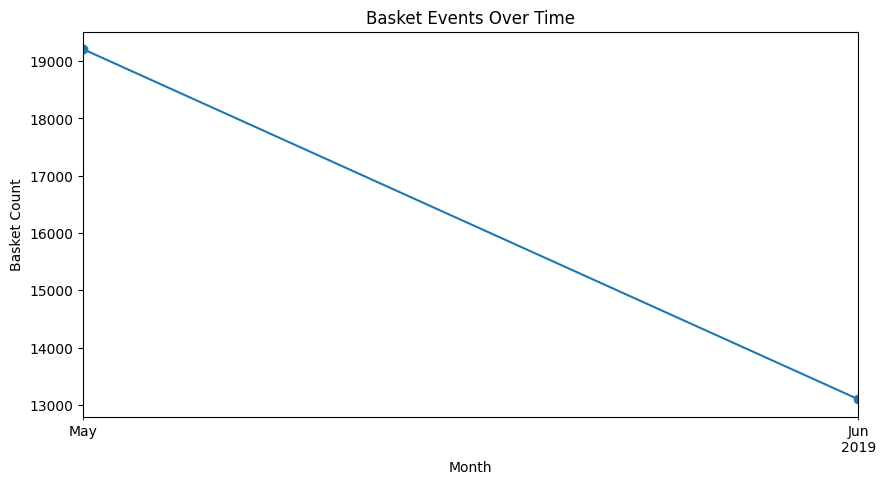

In [28]:
#Date-based Trends
#Transactions Over Time
baskets['basket_date'] = pd.to_datetime(baskets['basket_date'])
baskets['basket_month'] = baskets['basket_date'].dt.to_period('M')
baskets.groupby('basket_month')['basket_count'].sum().plot(kind='line', marker='o', figsize=(10,5))
plt.title("Basket Events Over Time")
plt.ylabel("Basket Count")
plt.xlabel("Month")
plt.show()


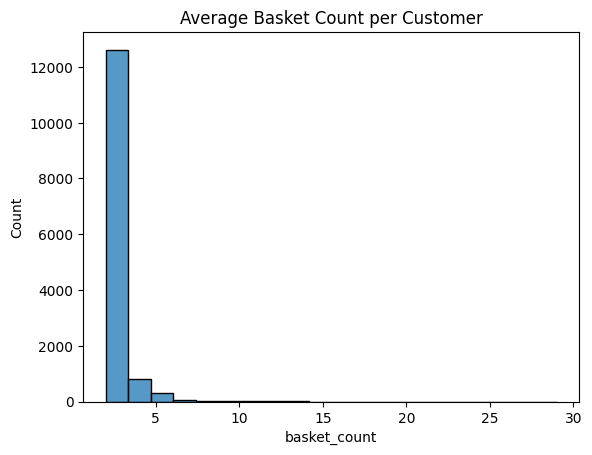

In [29]:
#Customer Behavior
#Average Basket Count per Customer
avg_basket_per_customer = baskets.groupby('customer_id')['basket_count'].sum()
sns.histplot(avg_basket_per_customer, bins=20)
plt.title("Average Basket Count per Customer")
plt.show()

In [30]:
#Merging Datasets
merged = pd.merge(customers, baskets, on='customer_id')
print(merged.head())

   customer_id   sex  customer_age  tenure  product_id basket_date  \
0      9500953  Male          55.0      96     3446783  2019-06-10   
1       851739  Male          40.0     129    32920704  2019-06-19   
2      9654043  Male          37.0      95    51307669  2019-06-08   
3      4912369  Male          36.0     114    33923115  2019-05-20   
4      9875271  Male          34.0      92    31586037  2019-06-06   

   basket_count basket_month  
0             3      2019-06  
1             2      2019-06  
2             2      2019-06  
3             2      2019-05  
4             2      2019-06  


In [32]:
#Merging both cleaned Datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

customers = pd.read_csv('/content/cleaned_data.csv')
baskets = pd.read_csv('/content/cleaned_basket_data.csv')

baskets['basket_date'] = pd.to_datetime(baskets['basket_date'], errors='coerce')

merged = pd.merge(customers, baskets, on='customer_id')


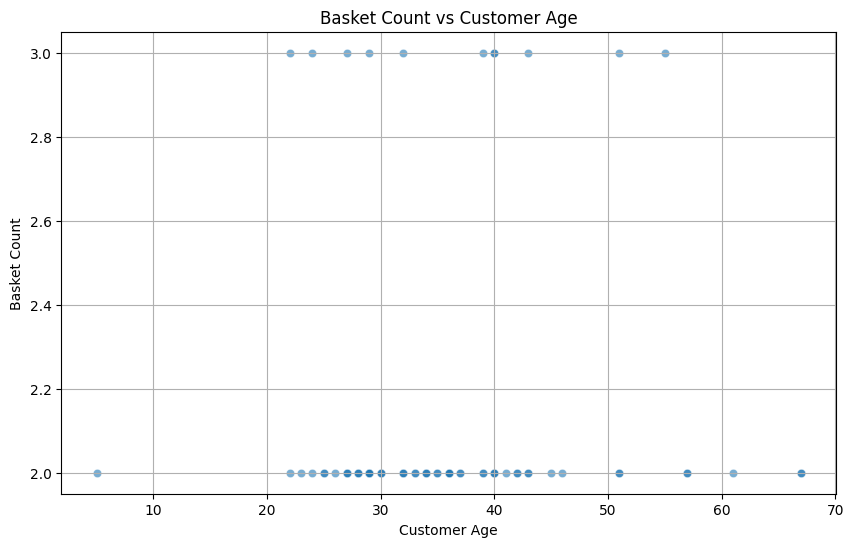

<ipython-input-34-779430717e9d>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg = merged.groupby('age_group')['basket_count'].mean().reset_index()


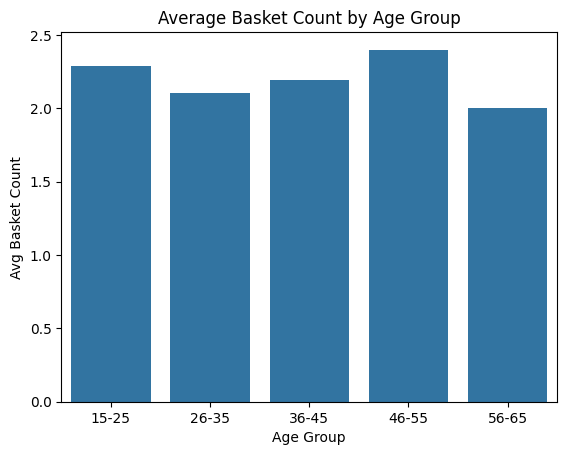

In [34]:
#Basket Behavior Based on Customer Age
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged, x='customer_age', y='basket_count', alpha=0.6)
plt.title("Basket Count vs Customer Age")
plt.xlabel("Customer Age")
plt.ylabel("Basket Count")
plt.grid(True)
plt.show()
merged['age_group'] = pd.cut(merged['customer_age'], bins=[15, 25, 35, 45, 55, 65],
                             labels=["15-25", "26-35", "36-45", "46-55", "56-65"])
age_group_avg = merged.groupby('age_group')['basket_count'].mean().reset_index()
sns.barplot(data=age_group_avg, x='age_group', y='basket_count')
plt.title("Average Basket Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Avg Basket Count")
plt.show()


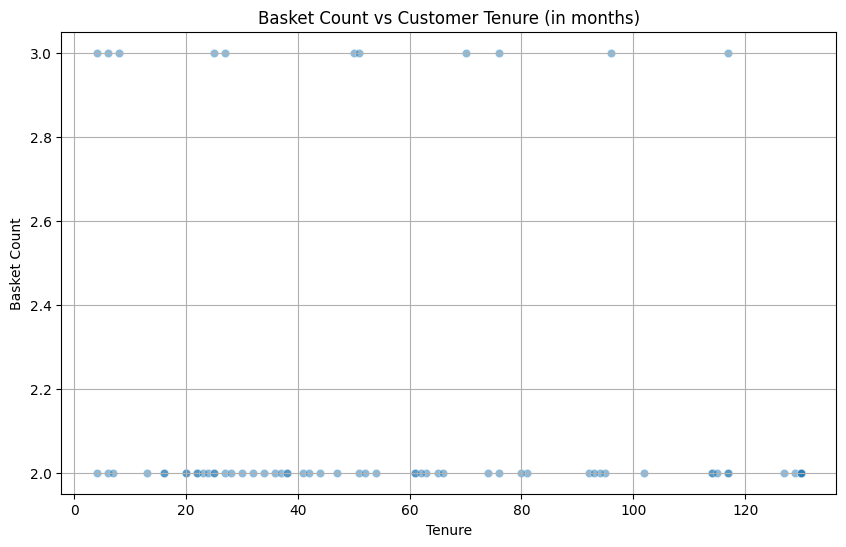

In [35]:
#Basket Trends Based on Tenure
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged, x='tenure', y='basket_count', alpha=0.5)
plt.title("Basket Count vs Customer Tenure (in months)")
plt.xlabel("Tenure")
plt.ylabel("Basket Count")
plt.grid(True)
plt.show()


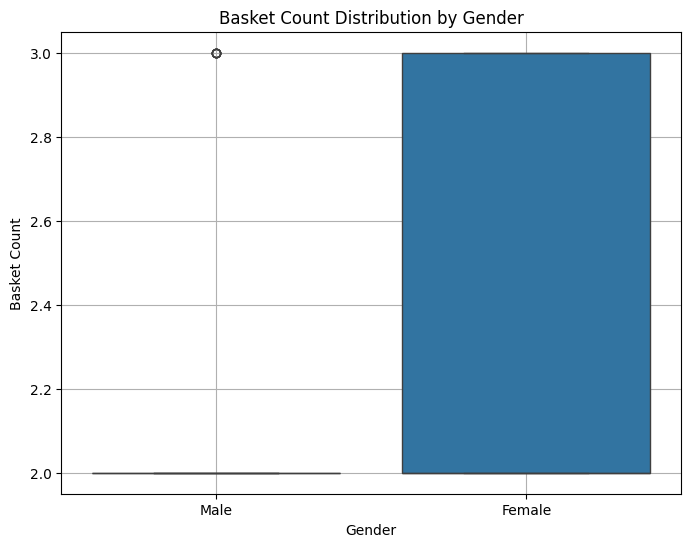

In [37]:
#Basket Behavior by Gender
plt.figure(figsize=(8,6))
sns.boxplot(data=merged, x='sex', y='basket_count')
plt.title("Basket Count Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Basket Count")
plt.grid(True)
plt.show()
